In [5]:
#importing the datasets 
dataset = pd.read_csv("covid19_Confirmed_dataset[1].csv")
dataset.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [6]:
#checking the shape of the data 
dataset.shape

(266, 104)

In [7]:
#deleting the useless columns  i.e. lat and long
df = dataset.drop(["Lat",'Long'],axis= 1 , inplace=True) #axis - 0 for deleting the row , 1 for deleting the column 
dataset.head()


,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [8]:
#aggregate the rows by country 
corona_dataset_aggregated = dataset.groupby("Country/Region").sum() #grouping the data based on certain attribute 

In [9]:
corona_dataset_aggregated.head() #shows the dataset with respect to the countries 


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [10]:
corona_dataset_aggregated.shape

(187, 100)

<AxesSubplot:>

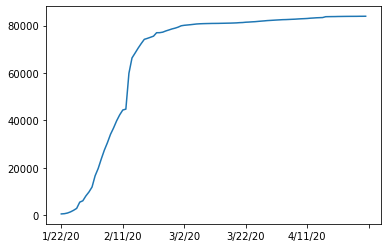

In [11]:
#visualize the data related to countries
corona_dataset_aggregated.loc["China"].plot()

<AxesSubplot:>

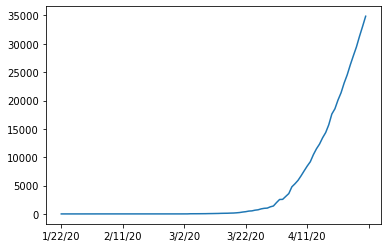

In [12]:
corona_dataset_aggregated.loc["India"].plot()

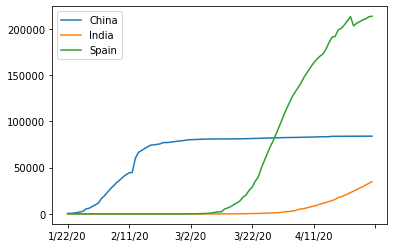

In [13]:
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["India"].plot()
corona_dataset_aggregated.loc["Spain"].plot()
plt.legend()

<AxesSubplot:>

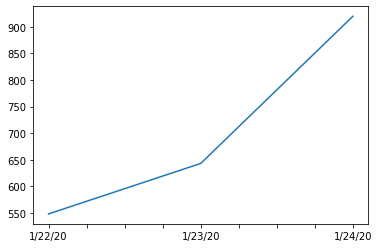

In [14]:
corona_dataset_aggregated.loc["China"][:3].plot() #slicing to check the first 3 days 

<AxesSubplot:>

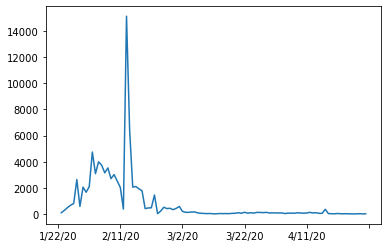

In [18]:
#calculating the first derivative 
corona_dataset_aggregated.loc["China"].diff().plot()

In [15]:
#maximum infection rate 
corona_dataset_aggregated.loc["China"].diff().max()

15136.0

In [16]:
corona_dataset_aggregated.loc["India"].diff().max()

1893.0

In [17]:
corona_dataset_aggregated.loc["Spain"].diff().max()

9630.0

In [18]:
countries = list(corona_dataset_aggregated.index) #storing all the countries in the form of a list , index is the countries 
max_infection_rates = [] #empty list 
for c in countries: #iterating over all the countries 
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max()) #appending the max inflection rates 
corona_dataset_aggregated["Max_infection_rates"] = max_infection_rates


In [19]:
corona_dataset_aggregated

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


In [20]:
#create a new dataframe 
corona_data = pd.DataFrame(corona_dataset_aggregated["Max_infection_rates"])

In [21]:
corona_data 


,Max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


In [29]:
#importing the world happiness data 
happiness_report = pd.read_csv("worldwide_happiness_report[1].csv")

In [30]:
happiness_report

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [31]:
#dropping the useless columns 
useless_columns = ["Overall rank","Generosity", "Perceptions of corruption"]
happiness_report.drop(useless_columns, axis = 1  , inplace = True)
happiness_report


,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,7.769,1.340,1.587,0.986,0.596
1,Denmark,7.600,1.383,1.573,0.996,0.592
2,Norway,7.554,1.488,1.582,1.028,0.603
3,Iceland,7.494,1.380,1.624,1.026,0.591
4,Netherlands,7.488,1.396,1.522,0.999,0.557
...,...,...,...,...,...,...
151,Rwanda,3.334,0.359,0.711,0.614,0.555
152,Tanzania,3.231,0.476,0.885,0.499,0.417
153,Afghanistan,3.203,0.350,0.517,0.361,0.000
154,Central African Republic,3.083,0.026,0.000,0.105,0.225


In [32]:
happiness_report
happiness_report.drop(["Score"],axis = 1 , inplace=True)
happiness_report


,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557
...,...,...,...,...,...
151,Rwanda,0.359,0.711,0.614,0.555
152,Tanzania,0.476,0.885,0.499,0.417
153,Afghanistan,0.350,0.517,0.361,0.000
154,Central African Republic,0.026,0.000,0.105,0.225


In [33]:
happiness_report.set_index("Country or region" , inplace = True)



In [34]:
#joining the datasets
corona_data.shape

(187, 1)

In [35]:
happiness_report.shape

(156, 4)

In [36]:
data = corona_data.join(happiness_report, how = "inner")
data

,Max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,29.0,0.960,1.427,0.805,0.154
Vietnam,19.0,0.741,1.346,0.851,0.543
Yemen,5.0,0.287,1.163,0.463,0.143
Zambia,9.0,0.578,1.058,0.426,0.431


In [37]:
#creating a correlation matrix to see the correlation using carl pearson correlation algorithm 
data.corr()

,Max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_infection_rates,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


C:\Users\NISHAKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='Max_infection_rates'>

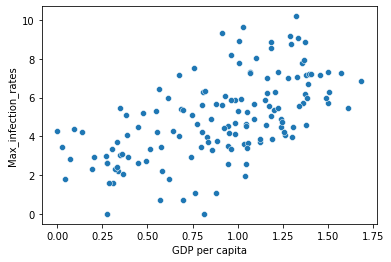

In [38]:
#visualising the data 
#plotting graph between gdp and max inflation rates 
x = data["GDP per capita"]
y = data["Max_infection_rates"]
sns.scatterplot(x,np.log(y)) #i.e. log of the max_inflection_rate values in order to have better estimation 


C:\Users\NISHAKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='Max_infection_rates'>

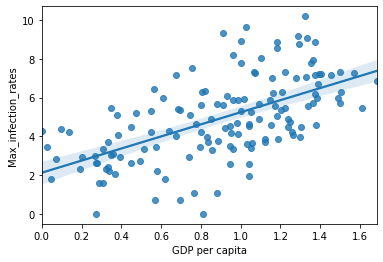

In [85]:
sns.regplot(x,np.log(y))

C:\Users\NISHAKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='Max_infection_rates'>

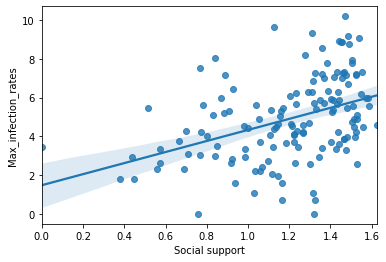

In [89]:
z = data['Social support']
sns.regplot(z,np.log(y))

C:\Users\NISHAKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Max_infection_rates'>

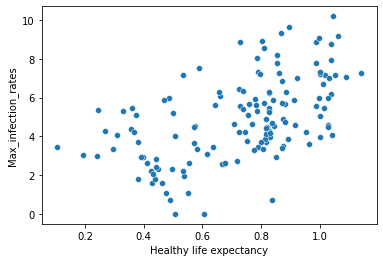

In [92]:
x = data["Healthy life expectancy"]
y = data["Max_infection_rates"]
sns.scatterplot(x,np.log(y))

C:\Users\NISHAKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Max_infection_rates'>

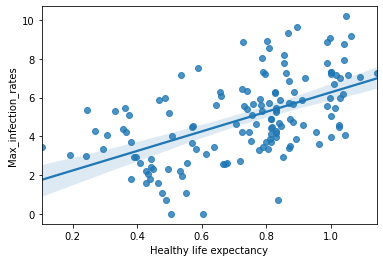

In [93]:
sns.regplot(x,np.log(y))